###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

### Part B: Multiple Linear (Auto) Regression

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 2\\rossmann-store-sales\\train.csv") #Loading train.csv into dataframe

C:\Users\Sharon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataframe.head() #Display the first five columns

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
dataframe["Store"].unique() #There are 1115 unique Stores

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [5]:
dataframe.sort_values(by=['Store']) #Sort Values according to Store number

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
766335,1,2,2013-08-13,5299,573,1,1,0,1
951425,1,4,2013-02-28,4676,581,1,0,0,0
372890,1,4,2014-08-07,4154,480,1,1,0,1
373825,1,3,2014-08-06,5337,575,1,1,0,1
...,...,...,...,...,...,...,...,...,...
375694,1115,2,2014-08-05,7028,459,1,1,0,1
374759,1115,3,2014-08-06,5746,400,1,1,0,1
373824,1115,4,2014-08-07,6616,451,1,1,0,1
379434,1115,5,2014-08-01,8580,514,1,1,0,1


#### 2. Create a data matrix of the shape (#_of_stores, 942) for the daily sales record of these stores.

In [6]:
df1 = dataframe.pivot(index='Store', columns='Date', values='Sales') #df1 sets Dataframe according to Index Store on columns date and values are sales
#print (df1.head(1))
df1.iloc[:,:]
#df_reset=df1.set_index('Store')

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


#### 1. Find all the stores that have sales recorded for 942 days -Out of 1115 Store, there are 934 stores remaining

In [7]:
df_new=df1.dropna()
len(df_new.index.values)

934

In [8]:
unique_store=((dataframe["Store"]).value_counts()==942).value_counts() #This shows we have to remove 181 stores to obtain 934 stores
print(unique_store)
# pd.Index.values(df_new)

True     934
False    181
Name: Store, dtype: int64


In [9]:
# print(df1.index.values)
# print(df_new.index.values)
list(set(df1.index.values) - set(df_new.index.values)) #List of 181 Stores that have been removed

[512,
 514,
 1027,
 518,
 522,
 13,
 1038,
 1041,
 20,
 22,
 534,
 1049,
 539,
 540,
 542,
 32,
 1056,
 547,
 36,
 41,
 1065,
 555,
 1067,
 46,
 51,
 52,
 1080,
 58,
 571,
 573,
 575,
 1092,
 1094,
 72,
 587,
 76,
 1102,
 1104,
 81,
 1107,
 1109,
 598,
 89,
 604,
 99,
 100,
 611,
 612,
 619,
 108,
 620,
 113,
 115,
 629,
 633,
 636,
 637,
 638,
 127,
 129,
 132,
 644,
 646,
 136,
 137,
 650,
 139,
 144,
 145,
 660,
 149,
 155,
 669,
 670,
 159,
 671,
 164,
 165,
 677,
 172,
 684,
 174,
 181,
 694,
 183,
 186,
 701,
 190,
 191,
 192,
 702,
 706,
 710,
 711,
 712,
 204,
 716,
 719,
 215,
 218,
 736,
 739,
 231,
 744,
 750,
 243,
 766,
 258,
 771,
 263,
 775,
 778,
 275,
 277,
 279,
 283,
 284,
 797,
 287,
 288,
 804,
 805,
 806,
 298,
 815,
 306,
 820,
 825,
 317,
 842,
 851,
 342,
 345,
 858,
 859,
 348,
 365,
 879,
 884,
 890,
 893,
 385,
 900,
 902,
 903,
 904,
 909,
 399,
 915,
 407,
 919,
 920,
 412,
 413,
 420,
 932,
 427,
 428,
 429,
 430,
 941,
 434,
 952,
 457,
 974,
 977,
 471,

#### 3. Use the first 800 stores in this data matrix for training and the rest for testing. Also split the sales data into 2 parts, the 1st part contains the information about the first 900 days of sales (these would be the features) and the 2nd contains the information about the last 42 days of sales (these would be the targets).

In [10]:
X_train=df_new.iloc[0:800,0:900]
Y_train=df_new.iloc[0:800,900:]
X_test=df_new.iloc[800:,0:900]
Y_test=df_new.iloc[800:,900:]
print("X_Train is",np.shape(X_train))
print("Y_Train is",np.shape(Y_train))
print("X_Test is",np.shape(X_test))
print("Y_Test is",np.shape(Y_test))

X_Train is (800, 900)
Y_Train is (800, 42)
X_Test is (134, 900)
Y_Test is (134, 42)


#### Without bias beta as a constant Here the X Matrix is not padded with 1 extra column for bias

#### 4. Iteratively build multiple linear regression models for column vectors of 𝑌𝑡𝑟𝑎𝑖𝑛. You are allowed to use the numpy routines for calculating inverses, transposing of matrices and matrix multiplication. You would need to create 42 models in this case (1 model for each day in the target sales matrix)


In [11]:
A=X_train
A_transpose=A.transpose() #𝑋𝑇∗𝑋
np.shape(A_transpose)
C=A_transpose.dot(A)
print(np.shape(C))
B=A_transpose.dot(Y_train)
print(np.shape(B))
# beta = np.linalg.lstsq(C,B,rcond=None)[0] 
beta = np.linalg.inv(C).dot(B) 

(900, 900)
(900, 42)


### $\beta = (Xtrain^T . Xtrain )^{-1} .( Xtrain^T . Ytrain)$

#### 5. Verify that you have learned 𝛽0:900 for each of the 42 models and use these learnedparameters to make predictions for each day ahead. In total 42 days.

In [12]:
beta

array([[ 1.07245875e+05,  1.63849250e+05,  1.31185625e+05, ...,
         1.43677750e+05,  1.48259000e+05,  1.68737750e+05],
       [ 2.21446826e+01,  3.42028050e+01,  2.78466059e+01, ...,
         3.09975385e+01,  3.18620749e+01,  3.55673899e+01],
       [-6.50510455e-01, -1.04305342e+00, -9.64333167e-01, ...,
        -1.33384491e+00, -9.50619771e-01, -1.32303712e+00],
       ...,
       [-2.36734204e-01, -6.69388101e-10,  8.91897015e-02, ...,
         3.15155801e-01,  1.54419170e-01, -4.37607776e-01],
       [ 6.68170532e-02, -1.16415322e-09, -2.26316136e-01, ...,
         9.48066574e-02,  6.96603081e-01,  8.61199200e-02],
       [ 2.06369035e-01,  1.13504939e-09,  3.60789806e-01, ...,
        -3.09873292e-01,  3.14630601e-01,  6.27760122e-01]])

In [13]:
np.shape(beta) #This is beta0:900 and has 42 columns , so it is for 42 days

(900, 42)

In [14]:
Y_Pred=np.dot(X_test,beta)
np.shape(Y_Pred)

(134, 42)

#### 6. Calculate and print the daily RMSE and MAE for all 42 sales values using test split (𝑋𝑡𝑒𝑠𝑡 as input). Also calculate and print overall average RMSE and MAE. (i.e. just the mean RMSE ofall 42 models).

In [15]:
rmse=np.sqrt(np.mean((Y_Pred-Y_test)**2)) #Calculation of RMSE
print(rmse)

Date
2015-06-20    4.501441e+07
2015-06-21    4.421722e+07
2015-06-22    5.167721e+07
2015-06-23    4.834381e+07
2015-06-24    4.804924e+07
2015-06-25    4.770277e+07
2015-06-26    5.141835e+07
2015-06-27    4.700892e+07
2015-06-28    4.559304e+07
2015-06-29    7.508415e+07
2015-06-30    7.469203e+07
2015-07-01    6.654335e+07
2015-07-02    6.462615e+07
2015-07-03    6.527648e+07
2015-07-04    4.712656e+07
2015-07-05    4.668428e+07
2015-07-06    5.849809e+07
2015-07-07    5.127361e+07
2015-07-08    5.359985e+07
2015-07-09    5.297958e+07
2015-07-10    5.432798e+07
2015-07-11    4.725009e+07
2015-07-12    4.809192e+07
2015-07-13    7.199845e+07
2015-07-14    6.522454e+07
2015-07-15    6.294240e+07
2015-07-16    6.155009e+07
2015-07-17    6.094982e+07
2015-07-18    4.949348e+07
2015-07-19    5.035825e+07
2015-07-20    5.612182e+07
2015-07-21    5.054487e+07
2015-07-22    4.945907e+07
2015-07-23    5.174279e+07
2015-07-24    5.210784e+07
2015-07-25    4.524080e+07
2015-07-26    4.856705e

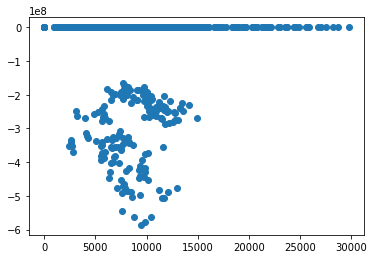

In [16]:
plt.scatter(Y_test,Y_Pred)

In [17]:
MAE=(abs(Y_test-Y_Pred).mean()).mean() #Calculation of Mean Absolute Error
np.sqrt(MAE)

3050.3174824494963

In [18]:
MSE = np.square(np.subtract(Y_test,Y_Pred)).mean() 
 
RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

Date
2015-06-20    4.501441e+07
2015-06-21    4.421722e+07
2015-06-22    5.167721e+07
2015-06-23    4.834381e+07
2015-06-24    4.804924e+07
2015-06-25    4.770277e+07
2015-06-26    5.141835e+07
2015-06-27    4.700892e+07
2015-06-28    4.559304e+07
2015-06-29    7.508415e+07
2015-06-30    7.469203e+07
2015-07-01    6.654335e+07
2015-07-02    6.462615e+07
2015-07-03    6.527648e+07
2015-07-04    4.712656e+07
2015-07-05    4.668428e+07
2015-07-06    5.849809e+07
2015-07-07    5.127361e+07
2015-07-08    5.359985e+07
2015-07-09    5.297958e+07
2015-07-10    5.432798e+07
2015-07-11    4.725009e+07
2015-07-12    4.809192e+07
2015-07-13    7.199845e+07
2015-07-14    6.522454e+07
2015-07-15    6.294240e+07
2015-07-16    6.155009e+07
2015-07-17    6.094982e+07
2015-07-18    4.949348e+07
2015-07-19    5.035825e+07
2015-07-20    5.612182e+07
2015-07-21    5.054487e+07
2015-07-22    4.945907e+07
2015-07-23    5.174279e+07
2015-07-24    5.210784e+07
2015-07-25    4.524080e+0

In [19]:
Y_Pred

array([[ 23532.93240508,  28615.50972919,  29360.47788472, ...,
         27568.07864121,  29175.80743837,  33498.56343319],
       [ 11920.20991631,   3796.63963675,   9260.07620605, ...,
          5846.77815959,   7110.20845288,  10415.76756748],
       [ 25902.53088515,  41366.09449108,  41787.74137033, ...,
         41715.8678872 ,  39496.56940747,  47218.65723426],
       ...,
       [-22797.22060272, -44890.82042719, -29795.30942006, ...,
        -28774.26626449, -33519.61399657, -40131.04942724],
       [ 62916.88876204,  59180.77614492,  65160.46795145, ...,
         61388.56518056,  81797.94737917,  91124.04251475],
       [-27272.90933971, -53882.37045203, -36356.89839663, ...,
        -38312.75387857, -33016.37854482, -42842.37597424]])

#### With bias b0 as constant Here X is padded with 1 . So it is done on both X_Train and X_test

In [20]:
ones_matrix_train = np.ones((800,1))
A_train=np.hstack([X_train, ones_matrix_train])
print(np.shape(A_train))
one_matrix_test=np.ones((134,1))
A_test=np.hstack([X_test, one_matrix_test])
print(np.shape(A_test))
A_transpose=A_train.transpose()
np.shape(A_transpose)
C=A_transpose.dot(A_train)
print(np.shape(C))
B=A_transpose.dot(Y_train)
print(np.shape(B))
# beta = np.linalg.lstsq(C,B,rcond=None)[0] 
beta = np.linalg.inv(C).dot(B) 

(800, 901)
(134, 901)
(901, 901)
(901, 42)


In [21]:
beta

array([[-1.71016250e+04, -5.24842500e+04, -2.44001250e+04, ...,
        -2.54377500e+04, -2.52872500e+04, -2.79540000e+04],
       [ 4.00192773e+00,  7.46481182e+00,  5.58482095e+00, ...,
         6.33783099e+00,  6.52036641e+00,  6.88665946e+00],
       [-1.14354881e+01, -1.69343144e+01, -1.40948977e+01, ...,
        -1.60561108e+01, -1.60105200e+01, -1.84209963e+01],
       ...,
       [ 6.44860320e-02, -3.84170562e-09, -2.37148021e-01, ...,
         7.60697121e-02,  6.75380667e-01,  7.23830070e-02],
       [ 1.91323699e-01,  3.20142135e-09,  2.90875845e-01, ...,
        -4.30810233e-01,  1.77651254e-01,  5.39095827e-01],
       [ 1.01177744e+02,  2.69059092e-06,  4.70160871e+02, ...,
         8.13282660e+02,  9.21165395e+02,  5.96254092e+02]])

In [22]:
Y_Pred=np.dot(A_test,beta)

In [23]:
Y_Pred

array([[ 2.93038753e+04,  3.24979230e+04,  3.68155002e+04, ...,
         3.89717019e+04,  4.07028373e+04,  4.52168532e+04],
       [ 5.08321694e+01, -1.58004090e+04, -4.73708557e+03, ...,
        -8.33571158e+03, -7.52579389e+03, -6.85443603e+03],
       [-4.11774050e+04, -5.63349354e+04, -3.97701370e+04, ...,
        -4.96473031e+04, -5.39662937e+04, -5.89499288e+04],
       ...,
       [ 9.12011743e+03,  2.25136587e+03,  9.35138214e+03, ...,
         1.46011347e+04,  1.11930810e+04,  1.05080787e+04],
       [ 2.05863138e+04, -1.04448272e+04,  1.30837679e+04, ...,
         5.97853293e+03,  2.38524020e+04,  2.58162020e+04],
       [-1.29162274e+03, -1.31222513e+04, -5.53588771e+03, ...,
        -6.32738534e+03, -1.78474619e+02, -3.94776289e+03]])

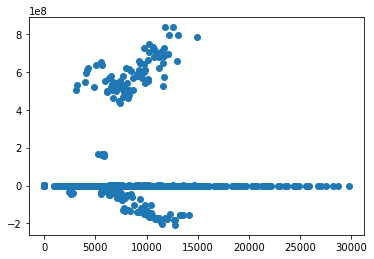

In [24]:
plt.scatter(Y_test,Y_Pred)

In [25]:
rmse=np.sqrt(np.mean((Y_Pred-Y_test)**2))
print(rmse)

Date
2015-06-20    5.888540e+07
2015-06-21    6.994422e+07
2015-06-22    6.920499e+07
2015-06-23    6.516023e+07
2015-06-24    6.453718e+07
2015-06-25    6.435765e+07
2015-06-26    6.941456e+07
2015-06-27    6.130146e+07
2015-06-28    7.190639e+07
2015-06-29    9.695166e+07
2015-06-30    9.772235e+07
2015-07-01    8.788244e+07
2015-07-02    8.508647e+07
2015-07-03    8.597642e+07
2015-07-04    6.094277e+07
2015-07-05    7.308044e+07
2015-07-06    7.565011e+07
2015-07-07    6.739265e+07
2015-07-08    7.064475e+07
2015-07-09    6.969859e+07
2015-07-10    7.200192e+07
2015-07-11    6.147098e+07
2015-07-12    7.506199e+07
2015-07-13    9.198119e+07
2015-07-14    8.552012e+07
2015-07-15    8.260070e+07
2015-07-16    8.059068e+07
2015-07-17    8.049956e+07
2015-07-18    6.371505e+07
2015-07-19    7.725310e+07
2015-07-20    7.252110e+07
2015-07-21    6.622158e+07
2015-07-22    6.525604e+07
2015-07-23    6.695830e+07
2015-07-24    6.875262e+07
2015-07-25    5.781864e+07
2015-07-26    7.501430e

In [26]:
MAE=(abs(Y_test-Y_Pred).mean())
print(MAE)

Date
2015-06-20    8.357994e+06
2015-06-21    1.054566e+07
2015-06-22    9.624900e+06
2015-06-23    9.094870e+06
2015-06-24    9.024273e+06
2015-06-25    8.998538e+06
2015-06-26    9.679370e+06
2015-06-27    8.688179e+06
2015-06-28    1.083054e+07
2015-06-29    1.398181e+07
2015-06-30    1.401294e+07
2015-07-01    1.237887e+07
2015-07-02    1.194274e+07
2015-07-03    1.202558e+07
2015-07-04    8.550566e+06
2015-07-05    1.099696e+07
2015-07-06    1.063298e+07
2015-07-07    9.421593e+06
2015-07-08    9.880727e+06
2015-07-09    9.778773e+06
2015-07-10    1.008187e+07
2015-07-11    8.672927e+06
2015-07-12    1.127620e+07
2015-07-13    1.315832e+07
2015-07-14    1.212871e+07
2015-07-15    1.168452e+07
2015-07-16    1.138687e+07
2015-07-17    1.125850e+07
2015-07-18    8.951819e+06
2015-07-19    1.157372e+07
2015-07-20    1.018238e+07
2015-07-21    9.259046e+06
2015-07-22    9.096549e+06
2015-07-23    9.378030e+06
2015-07-24    9.583900e+06
2015-07-25    8.121926e+06
2015-07-26    1.124601e

#### 7. Use the following approaches and report the overall average RMSE and MAE for them:

#### i. Repeating last sale value per store: Use the last recorded sales value of each store and repeat it for the next 42 days.


In [27]:
#Last Recorded Sale Value
Y_Pred_last=np.zeros((134,1))
for i in range(0,134):
   
    Y_Pred_last[i]=X_test.iloc[i,41:42]
    
Y_Pred_last

array([[ 7058.],
       [ 5429.],
       [ 4534.],
       [ 3841.],
       [ 9618.],
       [ 7885.],
       [ 6369.],
       [ 1376.],
       [ 3669.],
       [ 6382.],
       [    0.],
       [ 3353.],
       [ 5902.],
       [ 2682.],
       [ 3759.],
       [ 2762.],
       [ 4754.],
       [ 5628.],
       [ 4600.],
       [ 2706.],
       [ 5994.],
       [ 6246.],
       [ 9025.],
       [    0.],
       [ 6349.],
       [ 8643.],
       [ 7066.],
       [ 4718.],
       [ 2819.],
       [ 2384.],
       [ 7166.],
       [ 2664.],
       [ 7092.],
       [ 4696.],
       [ 4094.],
       [ 3553.],
       [ 6987.],
       [ 3722.],
       [ 4758.],
       [ 2123.],
       [ 6085.],
       [ 4374.],
       [ 4442.],
       [ 3976.],
       [ 5841.],
       [ 2059.],
       [ 1979.],
       [ 6291.],
       [ 4122.],
       [ 1672.],
       [ 6956.],
       [ 9864.],
       [ 7484.],
       [ 8221.],
       [ 4766.],
       [ 5099.],
       [ 4653.],
       [    0.],
       [ 5716.

In [28]:
#Last Recorded Value
rmse_last_recorded=np.sqrt(np.mean((Y_Pred_last-Y_test)**2))
print(rmse_last_recorded)
MAE_last_recorded=(abs(Y_Pred_last-Y_test).mean())
print(MAE_last_recorded)

Date
2015-06-20    2588.864792
2015-06-21    5449.814998
2015-06-22    2089.256020
2015-06-23    2164.729584
2015-06-24    2132.927200
2015-06-25    2100.879230
2015-06-26    2285.995591
2015-06-27    2628.490515
2015-06-28    5441.011115
2015-06-29    6533.722995
2015-06-30    6314.935458
2015-07-01    3894.949474
2015-07-02    3286.293824
2015-07-03    3312.457393
2015-07-04    2225.536363
2015-07-05    5442.408908
2015-07-06    2716.240572
2015-07-07    2078.684276
2015-07-08    2253.287866
2015-07-09    2261.169696
2015-07-10    2353.581908
2015-07-11    2332.380852
2015-07-12    5438.811915
2015-07-13    5633.506205
2015-07-14    4277.690587
2015-07-15    3673.007714
2015-07-16    3360.771849
2015-07-17    2999.620474
2015-07-18    2476.710261
2015-07-19    5430.663984
2015-07-20    2475.578000
2015-07-21    2043.740814
2015-07-22    2027.192220
2015-07-23    2101.210992
2015-07-24    2141.217210
2015-07-25    2366.819117
2015-07-26    5431.018719
2015-07-27    5502.916007
2015-07

#### ii. Repeating mean value per store: Repeat the mean of sales for the sales horizon.

In [29]:
Y_Pred_msv=np.zeros((134,1))
for i in range(134):
    Y_Pred_msv[i]=X_test.iloc[i,:].mean()
    
Y_Pred_msv
    

array([[ 5857.26111111],
       [ 5552.13333333],
       [ 5390.61888889],
       [ 5437.84222222],
       [ 8880.46555556],
       [ 8015.79777778],
       [ 7046.99      ],
       [ 3984.97111111],
       [ 7162.52888889],
       [ 5941.98666667],
       [ 2777.86222222],
       [ 2749.34666667],
       [ 6751.54777778],
       [ 2539.68      ],
       [ 5299.06222222],
       [ 6384.33666667],
       [ 5768.76      ],
       [ 5961.72555556],
       [ 5181.85333333],
       [ 5834.74333333],
       [ 6051.91666667],
       [ 6653.79777778],
       [ 8495.25444444],
       [ 4985.89111111],
       [ 6898.45555556],
       [ 5140.00888889],
       [ 5702.33888889],
       [ 5299.64444444],
       [ 4752.07111111],
       [ 4746.13333333],
       [ 6298.24888889],
       [ 3739.03555556],
       [ 7654.31222222],
       [ 5269.49888889],
       [ 4278.20555556],
       [ 3543.41666667],
       [ 7595.53      ],
       [ 4478.88666667],
       [ 5011.22333333],
       [ 6124.44888889],


In [30]:
#Mean of All Stores
rmse_mean_store=np.sqrt(np.mean((Y_Pred_msv-Y_test)**2))
print(rmse_mean_store)
MAE_mean_store=(abs(Y_Pred_msv-Y_test).mean())
print(MAE_mean_store)

Date
2015-06-20    1530.357548
2015-06-21    6027.605140
2015-06-22     755.636055
2015-06-23     780.062204
2015-06-24     730.254880
2015-06-25     754.841944
2015-06-26     717.384263
2015-06-27    1507.281438
2015-06-28    6025.395011
2015-06-29    5352.445501
2015-06-30    5167.573363
2015-07-01    2759.726947
2015-07-02    2137.863078
2015-07-03    2020.045464
2015-07-04    1429.578337
2015-07-05    6033.993683
2015-07-06    1408.385870
2015-07-07     867.068944
2015-07-08     960.184155
2015-07-09     914.212169
2015-07-10    1037.885622
2015-07-11    1473.333248
2015-07-12    6024.203077
2015-07-13    4552.963072
2015-07-14    3058.225874
2015-07-15    2448.320320
2015-07-16    2101.829793
2015-07-17    1678.682838
2015-07-18    1519.790959
2015-07-19    6019.227273
2015-07-20    1221.222110
2015-07-21     856.012995
2015-07-22     882.512444
2015-07-23     893.964823
2015-07-24     833.037322
2015-07-25    1733.089901
2015-07-26    6018.206075
2015-07-27    4371.289420
2015-07

#### iii. Repeating mean value per store per weekday: For each of the 42 days ahead get their predictions as a mean of all sales recorded for that day of week in the past. For e.g., the prediction of Monday ahead should be the mean of all sales for this particular store on all previous Mondays.

In [31]:
from statistics import mean
list1=[]
list3=[]


for i in range(42): #This goes for 42 days
    list2=[]
    for j in range(7): #This loop is for seven days of the week
        for k in range(0,893,7): # This loop is for all days of week for the 900 Columns
            list1.append(X_test.iloc[i,j+k])
        list2.append(mean(list1))
    list3.append(mean(list2))

In [32]:
print(list3)
rmse_week=np.sqrt(np.mean((list3-Y_test)**2))
print(rmse_week)
MAE_week=(abs(Y_test-list3).mean())
print(MAE_week)

[6696.950757334183, 5879.293932413073, 5710.790794624456, 5624.344666150406, 6061.757150285182, 6444.203367916021, 6602.065453641949, 6418.215360637773, 6356.20455772924, 6362.849951513653, 6141.717147738165, 5850.316255172198, 5788.569215387063, 5673.80392609916, 5571.911776825466, 5598.210365221375, 5622.296446433952, 5634.559289799736, 5624.834686714697, 5623.430266433597, 5638.646966238669, 5673.646061516619, 5765.0589423277415, 5791.9833778556895, 5804.710140894757, 5808.581902970549, 5796.1111126617, 5781.460970397652, 5751.49818223923, 5721.0058299490875, 5718.308139931983, 5687.012210373826, 5699.495155929291, 5714.39669976634, 5682.193088566993, 5631.584837101585, 5641.9034834100285, 5643.18272067976, 5619.5932001537785, 5622.234613200815, 5619.480394994567, 5608.529025660902]
Date
2015-06-20    2797.914876
2015-06-21    5824.175963
2015-06-22    1982.217279
2015-06-23    1934.591272
2015-06-24    1973.638545
2015-06-25    2175.211372
2015-06-26    2115.793978
2015-06-27    27

#### 8. Reason why or why not Linear Regression is a good choice for this task.- Multiple linear regression is not a good choice as the model accuracy is very low. We would require more efficient models to deal with the same. Taking Inverse of Matrix becomes an expensive operation

#References:

 - https://stackoverflow.com/questions/38067726/pandas-how-to-pivot-one-column-in-rows-into-columns
 - https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/
 - https://cmdlinetips.com/2018/03/how-to-filter-a-pandas-dataframe-based-on-null-values-of-a-column/
 - https://stackoverflow.com/questions/3462143/get-difference-between-two-lists
 - https://stackoverflow.com/questions/21926020/how-to-calculate-rmse-using-ipython-numpy
 - https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
 - https://stackoverflow.com/questions/17679140/multiple-linear-regression-with-python
 - https://towardsdatascience.com/vector-auto-regression-for-multivariate-time-series-forecasting-cf5216c9ce23